In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [68]:
datos = pd.read_excel("datos_palmitas.xlsx",sheet_name="Datos")
#datos.index=datos["Fecha"]
#datos = datos[~datos.index.duplicated(keep='first')]
#datos = datos.sort_index()
datos.drop(["Fecha"],axis=1,inplace=True)
datos.head(10)

,Cloro_Residual,Caudal entrada,Conductividad entrada,Nivel tanque,Presion entrada,Turbiedad entrada,Hipoclorito
0,1.054378,2.416317,24.648521,2.68894,30.519623,0.495125,31.158679
1,1.030096,2.417332,24.542732,2.76148,30.489029,0.508532,31.562505
2,1.019595,2.417332,24.546078,2.76923,30.519623,0.505999,31.738202
3,1.016194,2.417497,24.549061,2.78008,30.499229,0.502350,31.795255
4,1.024342,2.417497,24.521473,2.79217,30.519623,0.498966,31.658703
5,1.016600,2.416968,24.501980,2.80023,30.499229,0.497572,31.788433
6,1.013455,2.417433,24.484245,2.80860,30.489029,0.494487,31.841248
7,0.990910,2.416795,24.473400,2.81728,30.509426,0.486125,32.221464
8,1.001782,2.416967,24.484558,2.82782,30.519623,0.480256,32.037727
9,0.998896,0.547411,24.495468,2.84642,30.489029,0.481176,32.086442


In [69]:
datos.isnull().sum()

Cloro_Residual            1
Caudal entrada           55
Conductividad entrada     1
Nivel tanque              4
Presion entrada           6
Turbiedad entrada         0
Hipoclorito               0
dtype: int64

In [70]:
datos['Caudal entrada'].fillna(method='ffill',inplace=True)
datos['Cloro_Residual'].fillna(method='ffill',inplace=True)
datos['Conductividad entrada'].fillna(method='ffill',inplace=True)
datos['Nivel tanque'].fillna(method='ffill',inplace=True)
datos['Presion entrada'].fillna(method='ffill',inplace=True)

In [71]:
print(datos['Cloro_Residual'].quantile(0.98),datos['Cloro_Residual'].quantile(0.02))


1.7389904308319082 0.7636728334426879


In [72]:
datos['Cloro_Residual'][datos['Cloro_Residual']>1.87] = datos['Cloro_Residual'].quantile(0.98)
datos['Cloro_Residual'][datos['Cloro_Residual']<0.82] = datos['Cloro_Residual'].quantile(0.02)

<AxesSubplot:>

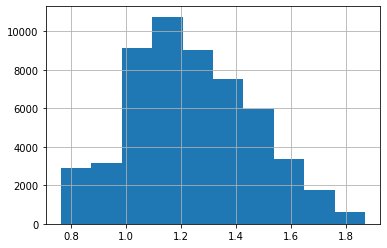

In [73]:
datos['Cloro_Residual'].hist()

In [74]:
datos['Caudal entrada'].describe()

count    54143.000000
mean         1.705634
std          0.911616
min          0.000000
25%          1.835028
50%          2.141835
75%          2.248621
max          6.057432
Name: Caudal entrada, dtype: float64

In [75]:
datos['Caudal entrada'][datos['Caudal entrada']==0] = datos['Caudal entrada'].mean()

In [76]:
datos['Caudal entrada'].quantile(0.98)

2.4518395423889157

In [77]:
datos['Caudal entrada'][datos['Caudal entrada']>2.43] = datos['Caudal entrada'].quantile(0.98)

<AxesSubplot:>

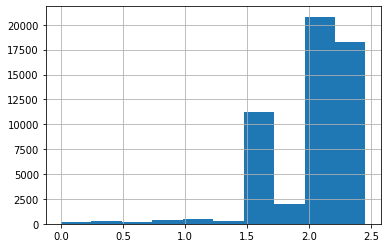

In [78]:
datos['Caudal entrada'].hist()

In [79]:
datos['Conductividad entrada'].describe()

count    54143.000000
mean        25.036868
std          1.551001
min          0.000000
25%         23.736004
50%         24.901997
75%         25.968735
max         54.909737
Name: Conductividad entrada, dtype: float64

In [80]:
datos['Conductividad entrada'].quantile(0.02)

22.798090667724633

In [81]:
datos['Conductividad entrada'].quantile(0.98)

28.607726898193373

In [82]:
datos['Conductividad entrada'][datos['Conductividad entrada']<22.78] = datos['Conductividad entrada'].quantile(0.02)
datos['Conductividad entrada'][datos['Conductividad entrada']>28.34] = datos['Conductividad entrada'].quantile(0.98)

In [83]:
datos['Nivel tanque'].describe()
datos['Nivel tanque'].quantile(0.02)

1.1829104042053245

In [84]:
datos['Nivel tanque'][datos['Nivel tanque']<1.44] = datos['Nivel tanque'].quantile(0.02)

In [85]:
datos['Presion entrada'].describe()

count    54143.000000
mean        31.204899
std          2.546427
min          0.000000
25%         30.601196
50%         30.907108
75%         31.416958
max         46.702263
Name: Presion entrada, dtype: float64

In [86]:
print(datos['Presion entrada'].quantile(0.02),datos['Presion entrada'].quantile(0.98))

23.349499969482437 34.2211303710938


In [87]:
datos['Presion entrada'][datos['Presion entrada']<25.32] = datos['Presion entrada'].quantile(0.02)
datos['Presion entrada'][datos['Presion entrada']>34.23] = datos['Presion entrada'].quantile(0.98)

In [88]:
datos['Turbiedad entrada'].describe()

count    54143.000000
mean         2.655398
std         16.764284
min          0.000000
25%          0.561593
50%          0.864011
75%          1.454267
max        801.084839
Name: Turbiedad entrada, dtype: float64

In [89]:
print(datos['Turbiedad entrada'].quantile(0.02),datos['Turbiedad entrada'].quantile(0.95))

0.2843874049186708 4.922321510314937


In [90]:
datos['Turbiedad entrada'][datos['Turbiedad entrada']<0.30] = datos['Turbiedad entrada'].quantile(0.02)
datos['Turbiedad entrada'][datos['Turbiedad entrada']>6.02] = datos['Turbiedad entrada'].quantile(0.95)

<AxesSubplot:>

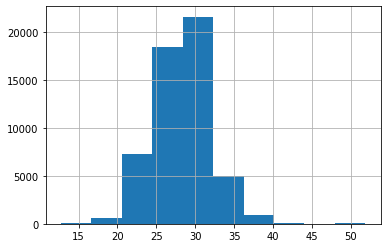

In [91]:
datos['Hipoclorito'].describe()
datos['Hipoclorito'].hist()

In [92]:
datos['Hipoclorito'].describe()

count    54143.000000
mean        28.366875
std          3.701383
min         12.725612
25%         25.813201
50%         28.506571
75%         30.776875
max         51.864000
Name: Hipoclorito, dtype: float64

In [93]:
datos['Hipoclorito'].quantile(0.02)

21.189539605818336

In [94]:
datos['Hipoclorito'].quantile(0.98)

36.21940464772449

In [95]:
datos['Hipoclorito'][datos['Hipoclorito']<19.56] = datos['Hipoclorito'].quantile(0.02)
datos['Hipoclorito'][datos['Hipoclorito']>35.16] = datos['Hipoclorito'].quantile(0.98)

In [96]:
datos.columns.tolist()
datos.head(10)

,Cloro_Residual,Caudal entrada,Conductividad entrada,Nivel tanque,Presion entrada,Turbiedad entrada,Hipoclorito
0,1.054378,2.416317,24.648521,2.68894,30.519623,0.495125,31.158679
1,1.030096,2.417332,24.542732,2.76148,30.489029,0.508532,31.562505
2,1.019595,2.417332,24.546078,2.76923,30.519623,0.505999,31.738202
3,1.016194,2.417497,24.549061,2.78008,30.499229,0.502350,31.795255
4,1.024342,2.417497,24.521473,2.79217,30.519623,0.498966,31.658703
5,1.016600,2.416968,24.501980,2.80023,30.499229,0.497572,31.788433
6,1.013455,2.417433,24.484245,2.80860,30.489029,0.494487,31.841248
7,0.990910,2.416795,24.473400,2.81728,30.509426,0.486125,32.221464
8,1.001782,2.416967,24.484558,2.82782,30.519623,0.480256,32.037727
9,0.998896,0.547411,24.495468,2.84642,30.489029,0.481176,32.086442


In [97]:
datos_corr = datos.drop('Hipoclorito',axis=1)

<AxesSubplot:>

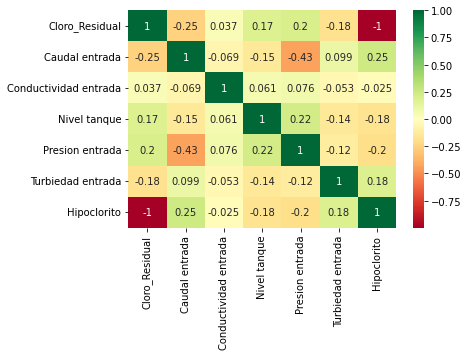

In [129]:
corr = datos.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='RdYlGn')

In [99]:
X = datos.iloc[:,[0,1,2,3,4,5]]
Y = datos['Hipoclorito']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [101]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred_lr = lrm.predict(X_test)
y_pred_train_lr = lrm.predict(X_train)

print(lrm.coef_)
print(lrm.intercept_)

[-1.53872366e+01 -4.63433762e-02  2.77749674e-02 -6.80999998e-02
  3.83525817e-03 -4.53365622e-03]
46.87358110588988


In [103]:
math.sqrt(mean_squared_error(y_train, y_pred_train_lr))

0.18709869072023597

In [104]:
math.sqrt(mean_squared_error(y_test, y_pred_lr))

0.1850346709772269

In [105]:
mean_absolute_error(y_train, y_pred_train_lr)

0.1328446060403402

In [106]:
mean_absolute_error(y_test, y_pred_lr)

0.13196049637636376

In [107]:
r2_score(y_train,y_pred_train_lr)

0.997123198996094

In [108]:
r2_score(y_test,y_pred_lr)

0.9971606579590828

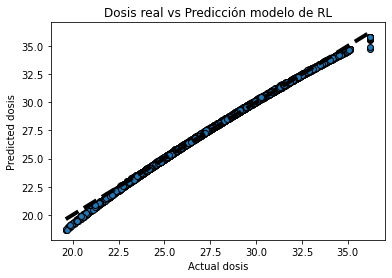

In [109]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual dosis')
ax.set_ylabel('Predicted dosis')
ax.set_title('Dosis real vs Predicción modelo de RL')
plt.show()

In [110]:
#cloro = 0.95
caudal = 0.12
conductividad = 20
nivel = 2.12
presion = 23
turbiedad = 0.3

In [111]:
hipoclorito = (lrm.coef_[0]*cloro + lrm.coef_[1]*caudal + lrm.coef_[2]*conductividad + lrm.coef_[3]*nivel + lrm.coef_[4]*presion + lrm.coef_[5]*turbiedad + lrm.intercept_)-2.349
hipoclorito

30.39912336678724

In [112]:
cloro_r = hipoclorito/(lrm.coef_[0] + lrm.coef_[1]*caudal + lrm.coef_[2]*conductividad + lrm.coef_[3]*nivel + lrm.coef_[4]*presion + lrm.coef_[5]*turbiedad + lrm.intercept_)
cloro_r

0.9506035225761897

In [113]:
print(lrm.coef_[0],lrm.coef_[1],lrm.coef_[2],lrm.coef_[3],lrm.coef_[4],lrm.coef_[5],lrm.intercept_)

-15.387236551750227 -0.04634337619637419 0.027774967440484938 -0.06809999984571606 0.003835258170932332 -0.004533656215271589 46.87358110588988


In [120]:
datos.columns.tolist()

['Cloro_Residual',
 'Caudal entrada',
 'Conductividad entrada',
 'Nivel tanque',
 'Presion entrada',
 'Turbiedad entrada',
 'Hipoclorito']

In [122]:
datos3 = datos.drop('Cloro_Residual',axis=1)

In [123]:
X = datos3.drop('Hipoclorito',axis=1)
Y = datos3['Hipoclorito']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [125]:
lrm = LinearRegression()
lrm.fit(X_train,y_train)

LinearRegression()

In [127]:
y_pred_lr = lrm.predict(X_test)
y_pred_train_lr = lrm.predict(X_train)

print(lrm.coef_)
print(lrm.intercept_)

[ 1.95438731  0.01658331 -1.11588261 -0.12660262  0.40590993]
30.210232108714195


In [128]:
r2_score(y_train,y_pred_train_lr)

0.1062781577101164

In [114]:
hipoclorito = datos['Cloro_Residual']
Cloro = datos['Hipoclorito']

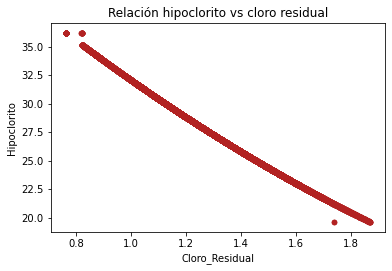

In [115]:
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'Cloro_Residual',
    y    = 'Hipoclorito',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Relación hipoclorito vs cloro residual');

In [116]:
X = datos[['Cloro_Residual']]
y = datos['Hipoclorito']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [117]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [47.38850599]
Coeficiente: [('Cloro_Residual', -15.365380987913523)]
Coeficiente de determinación R^2: 0.9969209332076422


D:\Analitica\cloro\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [118]:
hipoclorito = ((-15.368624599434991*0.9500) + 47.39296193)
print(hipoclorito)

32.79276856053676


In [119]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[28.53004381]
 [29.1402807 ]
 [34.30731604]]

El error (rmse) de test es: 0.19478193798857055
